# Discrete Fourier Transforms - Further Exercises

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.signal

Copy your Fourier transform functions into the box below

In [2]:
# Note: Using the "hard" solutions here because they are shorter

def compute_fourier_transform(data_time_domain):
    math_i = 1j # This is how to write sqrt(-1) = i in python.
    N = len(data_time_domain) # How many points in the data
    k = np.arange(N)
    n = np.arange(N)
    data_frequency_domain = np.zeros(N,dtype=np.complex128)
    for j in k:
        for i in n:
            data_frequency_domain[j] += data_time_domain[i] * \
                (np.cos(2 * np.pi * j  * i / N) - math_i * np.sin(2 * np.pi * j * i / N))
    return data_frequency_domain

def compute_inverse_fourier_transform(data_frequency_domain):
    math_i = 1j # This is how to write sqrt(-1) = i in python.
    N = len(data_frequency_domain) # How many points in the data
    k = np.arange(N)
    n = np.arange(N)
    data_time_domain = np.zeros(N,dtype=np.complex128)
    for i in n:
        for j in k:
            data_time_domain[j] += data_frequency_domain[i] * \
                (np.cos(2 * np.pi * j  * i / N) + math_i * np.sin(2 * np.pi * j * i / N))
    return data_time_domain / N



## Exercise 1.2: Fourier transform the following data

Fourier transform, and inverse Fourier transform, the following 4 datasets (`data_time_domain_CASE_1`, `data_time_domain_CASE_2`, `data_time_domain_CASE_3` and `data_time_domain_CASE_4`)? What do you notice about the Fourier transforms in each case? For each case you should

* Plot the original data
* Fourier transform the data, using your hand-written routine, and plot that.
* Inverse Fourier transform, using your routine, and plot that.
* Comment in-line what you notice about each case. Discuss with classmates and/or TAs and the lecturer.

In [ ]:
omega = 1. * (2*np.pi)
sample_rate = 1. / 16.
times = np.arange(256) * sample_rate

data_time_domain = np.cos(times * omega)
data_time_domain_CASE_1 = np.sin(times * omega)

data_time_domain_CASE_2 = np.sin(times * omega) + np.cos(times*2*omega) + np.sin(times*3*omega)

np.random.seed(1959)
data_time_domain_CASE_3 = np.random.normal(size=256)

data_time_domain_CASE_4 = np.zeros(256)
data_time_domain_CASE_4[3] = 1.

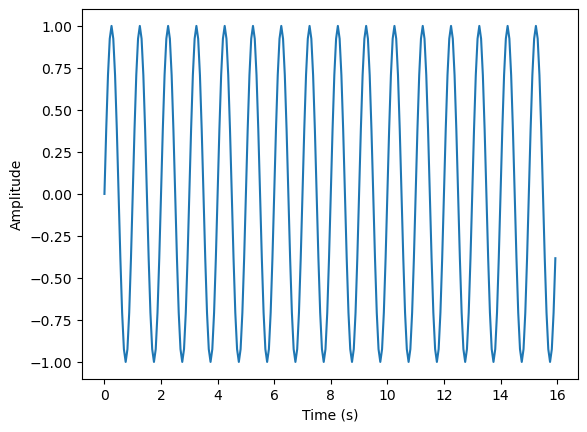

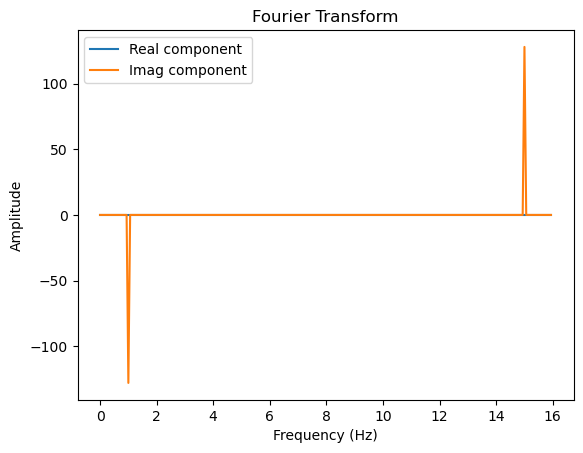

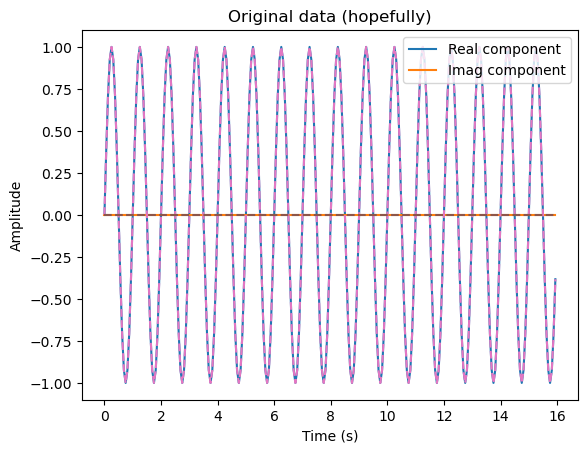

In [8]:
# We didn't supply the frequencies on purpose so you would have to think about it!
frequencies = np.arange(256) * (1./(256*sample_rate))

# CASE 1: Notice here that now Fourier transform is imaginary (and so symmetric part is negative)
plt.plot(times,data_time_domain_CASE_1)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.figure()
data_frequency_domain = compute_fourier_transform(data_time_domain_CASE_1)
plt.plot(frequencies, data_frequency_domain.real)
plt.plot(frequencies, data_frequency_domain.imag)
plt.title('Fourier Transform')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend(['Real component','Imag component'])

plt.figure()
data_time_domain_inverted = compute_inverse_fourier_transform(data_frequency_domain)
plt.plot(times, data_time_domain_CASE_1.real, c='tab:blue')
plt.plot(times, data_time_domain_CASE_1.imag, c='tab:orange')
plt.plot(times, data_time_domain_inverted.real, linestyle='--', c='tab:pink')
plt.plot(times, data_time_domain_inverted.imag, linestyle='--', c='tab:brown')
plt.title('Original data (hopefully)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend(['Real component','Imag component'])

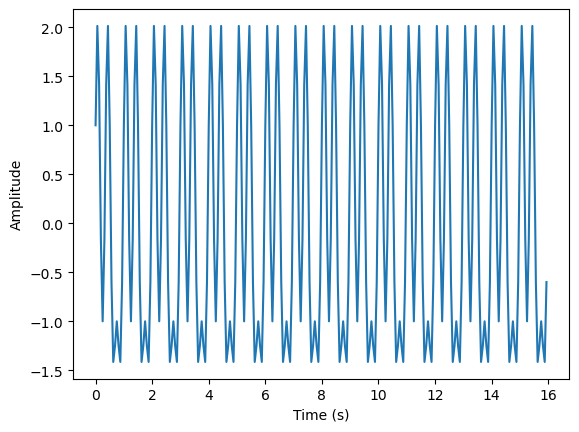

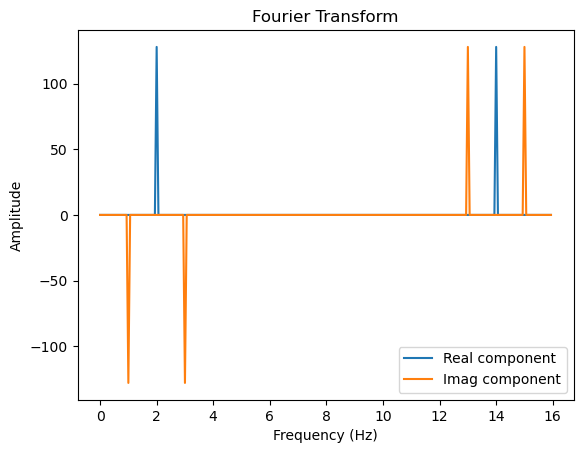

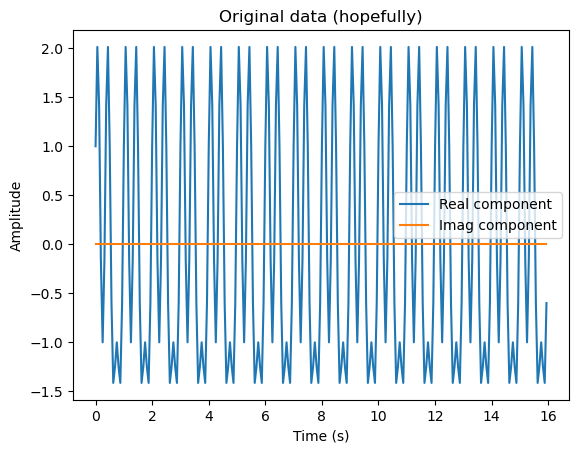

In [ ]:
# CASE 2: Here is a mix of the original 2 cases. Now it's not so easy to see the time-domain data.
plt.plot(times,data_time_domain_CASE_2)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.figure()
data_frequency_domain = compute_fourier_transform(data_time_domain_CASE_2)
plt.plot(frequencies, data_frequency_domain.real)
plt.plot(frequencies, data_frequency_domain.imag)
plt.title('Fourier Transform')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend(['Real component','Imag component'])

plt.figure()
data_time_domain_inverted = compute_inverse_fourier_transform(data_frequency_domain)
plt.plot(times, data_time_domain_CASE_2.real, c='tab:blue')
plt.plot(times, data_time_domain_CASE_2.imag, c='tab:orange')
plt.plot(times, data_time_domain_inverted.real, linestyle='--', c='tab:pink')
plt.plot(times, data_time_domain_inverted.imag, linestyle='--', c='tab:brown')
plt.title('Original data (hopefully)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend(['Real component','Imag component'])

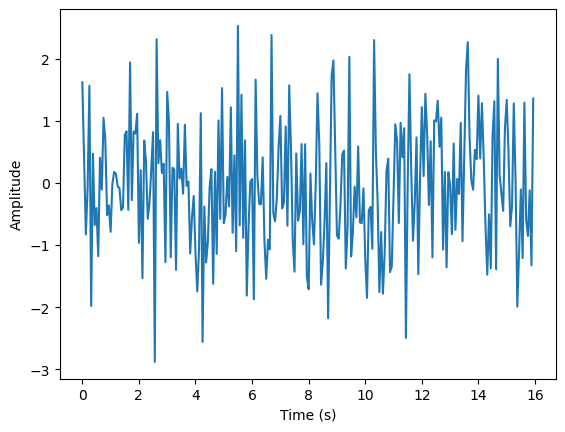

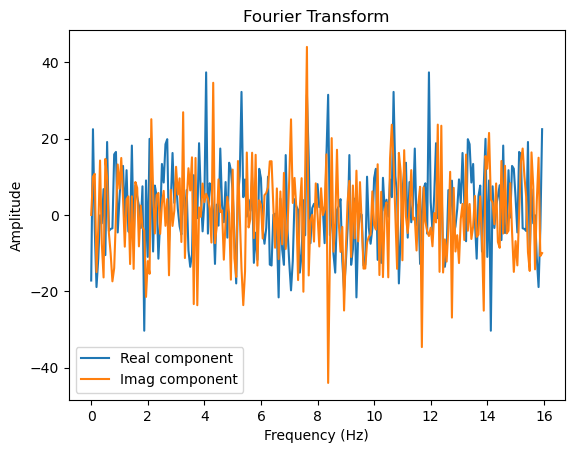

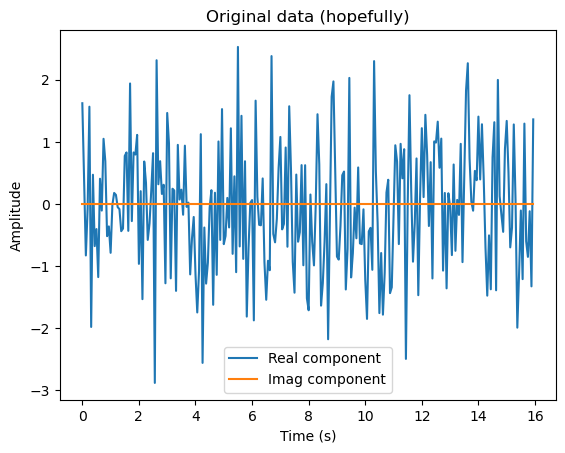

In [ ]:
# CASE 3: White noise in time-domain = white-noise in frequency domain
plt.plot(times,data_time_domain)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.figure()
data_frequency_domain = compute_fourier_transform(data_time_domain_CASE_3)
plt.plot(frequencies, data_frequency_domain.real)
plt.plot(frequencies, data_frequency_domain.imag)
plt.title('Fourier Transform')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend(['Real component','Imag component'])

plt.figure()
data_time_domain_inverted = compute_inverse_fourier_transform(data_frequency_domain)
plt.plot(times, data_time_domain_CASE_3.real, c='tab:blue')
plt.plot(times, data_time_domain_CASE_3.imag, c='tab:orange')
plt.plot(times, data_time_domain_inverted.real, linestyle='--', c='tab:pink')
plt.plot(times, data_time_domain_inverted.imag, linestyle='--', c='tab:brown')
plt.title('Original data (hopefully)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend(['Real component','Imag component'])

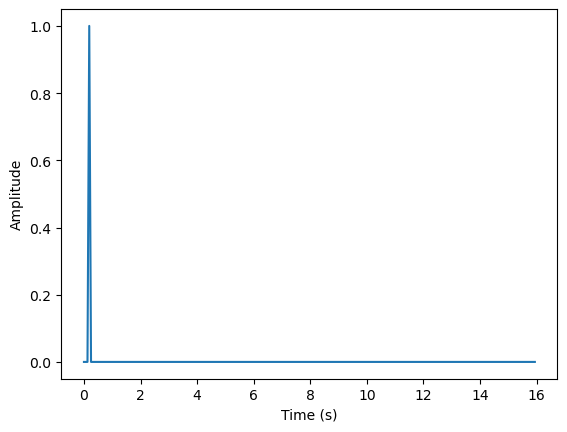

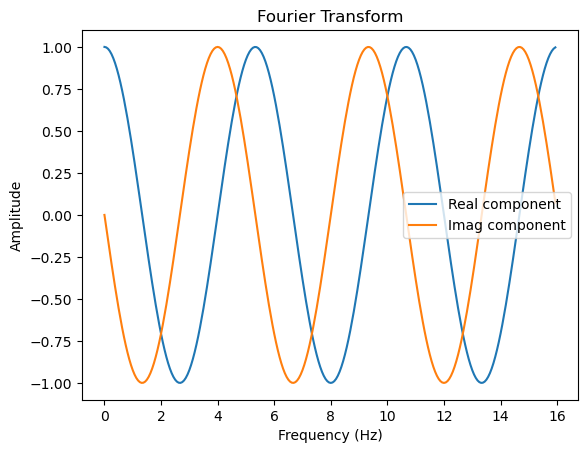

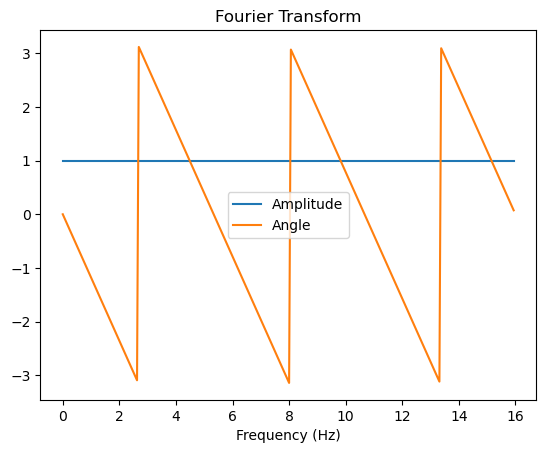

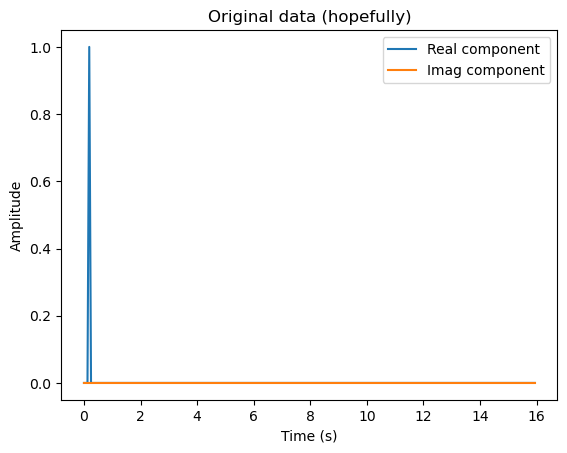

In [ ]:
# CASE 4: Delta-function in time domain = broadband in frequency domain. This is better viewed as amplitude and
# argument of the complex vector in the frequency domain.
plt.plot(times,data_time_domain_CASE_4)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.figure()
data_frequency_domain = compute_fourier_transform(data_time_domain_CASE_4)
plt.plot(frequencies, data_frequency_domain.real)
plt.plot(frequencies, data_frequency_domain.imag)
plt.title('Fourier Transform')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend(['Real component','Imag component'])

# EXTRA PLOT!
plt.figure()
data_frequency_domain = compute_fourier_transform(data_time_domain_CASE_4)
plt.plot(frequencies, abs(data_frequency_domain))
plt.plot(frequencies, np.angle(data_frequency_domain))
plt.title('Fourier Transform')
plt.xlabel('Frequency (Hz)')
plt.legend(['Amplitude','Angle'])

plt.figure()
data_time_domain_inverted = compute_inverse_fourier_transform(data_frequency_domain)
plt.plot(times, data_time_domain_CASE_4.real, c='tab:blue')
plt.plot(times, data_time_domain_CASE_4.imag, c='tab:orange')
plt.plot(times, data_time_domain_inverted.real, linestyle='--', c='tab:pink')
plt.plot(times, data_time_domain_inverted.imag, linestyle='--', c='tab:brown')
plt.title('Original data (hopefully)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend(['Real component','Imag component'])

## Exercise 1.3:

What is the computational complexity of your algorithm? This means, if I make the input vector twice as big (or three times as big or ...) and plot how long the algorithm takes to run what shape does it follow. We can use the build in ipython function `timeit` to evaluate this.

*Plot the output from the timeit commands below, how does the speed of your code scale as the length of the input increases?*

In [ ]:
# This will time your function for a set of lengths. You need to run this, plot the data that comes out and
# examine the resulting curve. Does it follow a y = a * x**2 + b * x + c curve?

# I have commented this out in the solution notebook so that it does'nt take a long time very time we run it

# WARNING: These data sets are longer than 256 samples. Make sure your Fourier transform function can handle that! 
# data_time_domain_1 = np.random.normal(size=256)
# %timeit -n 2 -r 2 compute_fourier_transform(data_time_domain_1)
# data_time_domain_2 = np.random.normal(size=256*2)
# %timeit -n 2 -r 2 compute_fourier_transform(data_time_domain_2)
# data_time_domain_3 = np.random.normal(size=256*3)
# %timeit -n 2 -r 2 compute_fourier_transform(data_time_domain_3)
# data_time_domain_4 = np.random.normal(size=256*4)
# %timeit -n 2 -r 2 compute_fourier_transform(data_time_domain_4)
# data_time_domain_5 = np.random.normal(size=256*5)
# %timeit -n 2 -r 2 compute_fourier_transform(data_time_domain_5)
# data_time_domain_6 = np.random.normal(size=256*6)
# %timeit -n 2 -r 2 compute_fourier_transform(data_time_domain_6)
# data_time_domain_7 = np.random.normal(size=256*7)
# %timeit -n 2 -r 2 compute_fourier_transform(data_time_domain_7)
# data_time_domain_8 = np.random.normal(size=256*8)
# %timeit -n 2 -r 2 compute_fourier_transform(data_time_domain_8)
# data_time_domain_9 = np.random.normal(size=256*9)
# %timeit -n 2 -r 2 compute_fourier_transform(data_time_domain_9)

1.97 s ± 137 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)
10.8 s ± 643 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)
18.6 s ± 1.69 s per loop (mean ± std. dev. of 2 runs, 2 loops each)
36.2 s ± 387 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)
57.1 s ± 1.15 s per loop (mean ± std. dev. of 2 runs, 2 loops each)
1min 10s ± 7.47 s per loop (mean ± std. dev. of 2 runs, 2 loops each)
1min 32s ± 1.36 s per loop (mean ± std. dev. of 2 runs, 2 loops each)
2min 14s ± 7.82 s per loop (mean ± std. dev. of 2 runs, 2 loops each)
2min 37s ± 163 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)


-0.9490476190475299 1.8369350649350247 1.7668398268398302


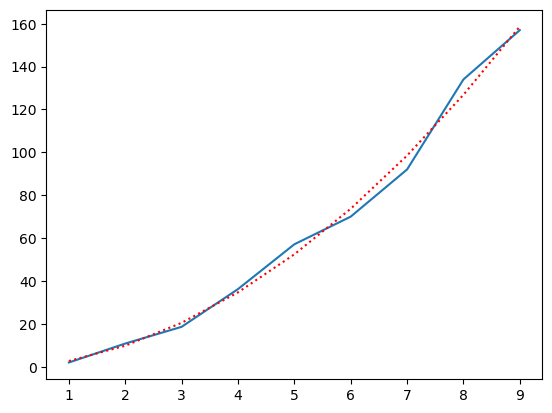

In [44]:
# Here are numbers from my function (running locally on my laptop) ...
# You'll need to use your own compute_fourier_transform
# You can fit a polynomial to this curve, but you should find it has x**2 and x components.
# Therefore the complexity of my function is x**2. Unless you've spend a few months writing this, you probably
# won't have a function with complexity smaller than x**2.
x = np.arange(1,10)
outputs = [1.97, 10.8, 18.6, 36.2, 57.1, 70, 92, 134, 157]
plt.plot(x,outputs)
# Fit a 2d polynomial to this:
squared, linear, offset = np.polyfit(x, outputs, 2)
print(offset, linear, squared)
plt.plot(x, offset + linear * x + x ** 2 * squared, c='r', linestyle=':')

## Exercise 1.4:

Use library functions to perform a Fourier transform. There are a few ways of doing this, but the simplest (IMO) is to use numpy to call into the FFTW algorithm. The FFTW algorithm has N log N complexity, so much faster for large Fourier transforms (FFT = Fast Fourier Transform, FFTW is a specific algorithm and stands for "Fastest Fourier Transform in the West"). Here you must first demonstrate this on the original data stream.


In [14]:
def compute_fourier_transform_numpy(data_time_domain):
    return np.fft.fft(data_time_domain)


def compute_inverse_fourier_transform_numpy(data_frequency_domain):
    return np.fft.ifft(data_frequency_domain)


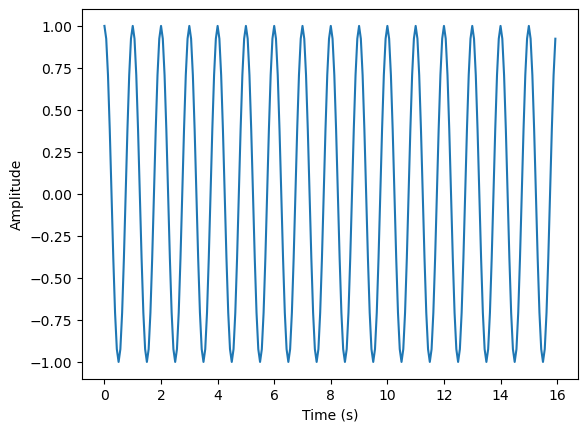

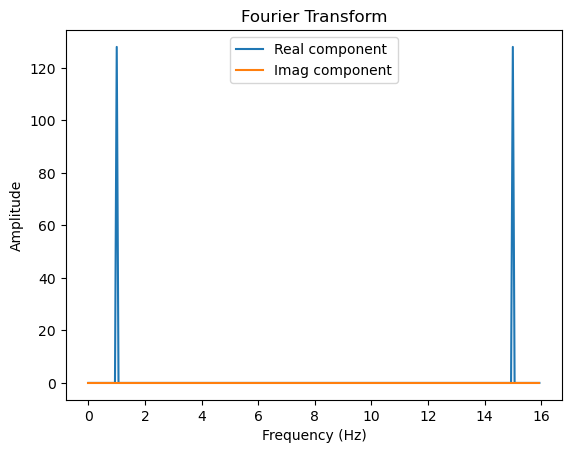

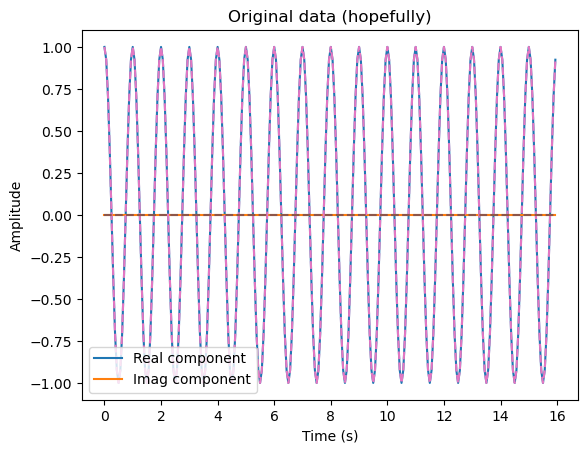

In [31]:
# Here's an example of using your functions to call numpy's FFT on the first example.
omega = 1. * (2*np.pi)
data_length = 256
sample_rate = 1. / 16.
times = np.arange(data_length) * sample_rate
frequencies = np.arange(data_length) * (1./(data_length*sample_rate))
data_time_domain = np.cos(times * omega)
plt.plot(times,data_time_domain)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

data_fourier_domain = compute_fourier_transform_numpy(data_time_domain)
plt.figure()
plt.plot(frequencies, data_fourier_domain.real)
plt.plot(frequencies, data_fourier_domain.imag)
plt.title('Fourier Transform')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend(['Real component','Imag component'])

plt.figure()
data_time_domain_inverted = compute_inverse_fourier_transform_numpy(data_fourier_domain)
plt.plot(times, data_time_domain.real, c='tab:blue')
plt.plot(times, data_time_domain.imag, c='tab:orange')
plt.plot(times, data_time_domain_inverted.real, linestyle='--', c='tab:pink')
plt.plot(times, data_time_domain_inverted.imag, linestyle='--', c='tab:brown')
plt.title('Original data (hopefully)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend(['Real component','Imag component'])

### More tasks for you

* Use numpy's FFT algorithm on the other data streams.
* Time numpy's FFT algorithm and compare to your algorithm

In [34]:
data_time_domain_1 = np.random.normal(size=256)
%timeit -n 2 -r 2 compute_fourier_transform_numpy(data_time_domain_1)
data_time_domain_2 = np.random.normal(size=256*2)
%timeit -n 2 -r 2 compute_fourier_transform_numpy(data_time_domain_2)
data_time_domain_3 = np.random.normal(size=256*3)
%timeit -n 2 -r 2 compute_fourier_transform_numpy(data_time_domain_3)
data_time_domain_4 = np.random.normal(size=256*4)
%timeit -n 2 -r 2 compute_fourier_transform_numpy(data_time_domain_4)
data_time_domain_5 = np.random.normal(size=256*5)
%timeit -n 2 -r 2 compute_fourier_transform_numpy(data_time_domain_5)
data_time_domain_6 = np.random.normal(size=256*6)
%timeit -n 2 -r 2 compute_fourier_transform_numpy(data_time_domain_6)
data_time_domain_7 = np.random.normal(size=256*7)
%timeit -n 2 -r 2 compute_fourier_transform_numpy(data_time_domain_7)
data_time_domain_8 = np.random.normal(size=256*8)
%timeit -n 2 -r 2 compute_fourier_transform_numpy(data_time_domain_8)
data_time_domain_9 = np.random.normal(size=256*9)
%timeit -n 2 -r 2 compute_fourier_transform_numpy(data_time_domain_9)

151 μs ± 40 μs per loop (mean ± std. dev. of 2 runs, 2 loops each)
245 μs ± 98 μs per loop (mean ± std. dev. of 2 runs, 2 loops each)
185 μs ± 28.5 μs per loop (mean ± std. dev. of 2 runs, 2 loops each)
213 μs ± 38.8 μs per loop (mean ± std. dev. of 2 runs, 2 loops each)
209 μs ± 28.8 μs per loop (mean ± std. dev. of 2 runs, 2 loops each)
262 μs ± 33.3 μs per loop (mean ± std. dev. of 2 runs, 2 loops each)
272 μs ± 27.7 μs per loop (mean ± std. dev. of 2 runs, 2 loops each)
298 μs ± 20.3 μs per loop (mean ± std. dev. of 2 runs, 2 loops each)
316 μs ± 30.4 μs per loop (mean ± std. dev. of 2 runs, 2 loops each)


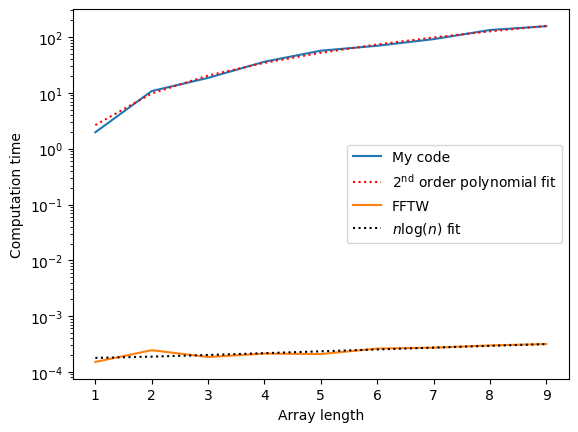

In [45]:
outputs_numpy = np.array([151, 245, 185, 213, 209, 262, 272, 298, 316]) * 1e-6

plt.semilogy(x, outputs, label="My code")
plt.plot(x, offset + linear * x + x ** 2 * squared, c='r', linestyle=':', label="$2^\mathrm{nd}$ order polynomial fit")
plt.semilogy(x, outputs_numpy, label="FFTW")
plt.xlabel("Array length")
plt.ylabel("Computation time")
# This is expected to be n log n, so we use log n as the input to polyfit
nlogn, nlogn_offset = np.polyfit(x * np.log(x), outputs_numpy, 1)
plt.plot(x, nlogn_offset + nlogn * x * np.log(x), c='k', linestyle=':', label="$n\log(n)$ fit")
plt.legend()